Импортирование библиотек и загрузка датасета.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist        
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import warnings 
warnings.filterwarnings('ignore') 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Предварительная обработка данных.

In [2]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
x_train.shape

(60000, 28, 28)

Построение модели.

In [3]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])


In [4]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,962 (2.56 MB)

 Trainable params: 669,962 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучение модели.

In [6]:
start_time = time.time()
history = model.fit(x_train, y_train_cat, batch_size=16, epochs=4, validation_split=0.2)
res = time.time()-start_time
res

Epoch 1/4
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8877 - loss: 0.3597 - val_accuracy: 0.9597 - val_loss: 0.1344
Epoch 2/4
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9674 - loss: 0.1085 - val_accuracy: 0.9674 - val_loss: 0.1163
Epoch 3/4
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9770 - loss: 0.0766 - val_accuracy: 0.9703 - val_loss: 0.1117
Epoch 4/4
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9807 - loss: 0.0616 - val_accuracy: 0.9751 - val_loss: 0.0920


80.23584532737732

Оцениваем точность.

In [7]:
model.evaluate(x_test, y_test_cat, verbose=2)


313/313 - 1s - 3ms/step - accuracy: 0.9761 - loss: 0.0837


[0.08373407274484634, 0.9761000275611877]

 Предсказываем результат на новых данных.

In [8]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Построение графиков.


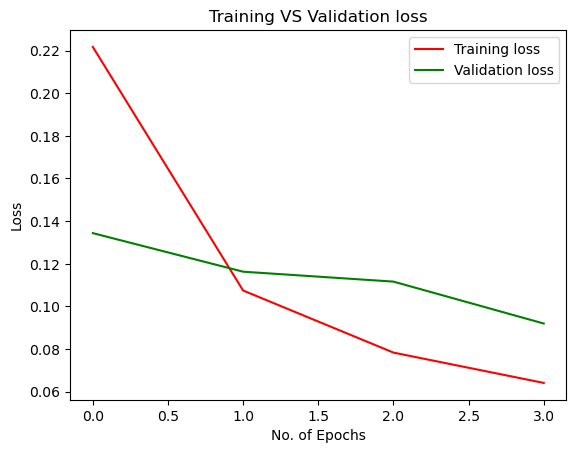

In [9]:
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

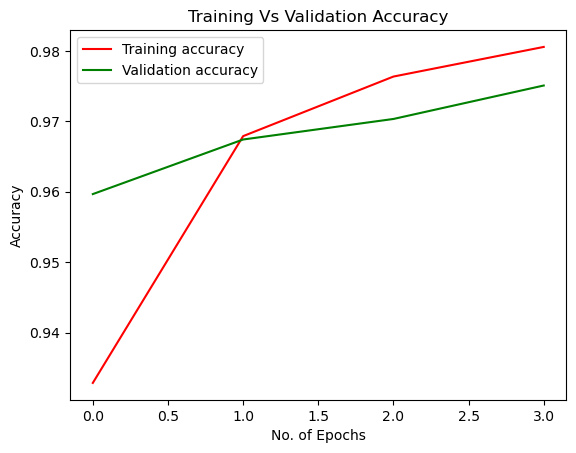

In [10]:
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()